modify brightness of the image Performing appropriate operations 
modify the contrast of the image using various filters and compare their result
remove noise from the image using linear filters 
remove noise from the image using non linear filters 
Identify the edge in the image using appropriate filter

In [2]:
import cv2
print(cv2.__version__)
import matplotlib.pyplot as plt
import numpy as np

4.10.0


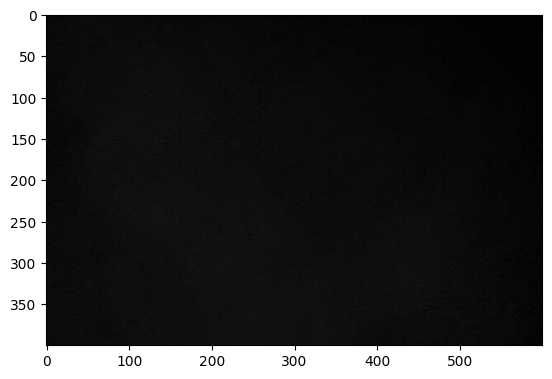

In [3]:
original=cv2.imread('black.jpg')
plt.imshow(cv2.cvtColor(original,cv2.COLOR_BGR2RGB))

In [4]:
def increase_brightness(img,value):
    brightened=np.clip(img+value,0,255).astype(np.uint8)#Limiting the range between 0 to 255
    return brightened

Text(0.5, 1.0, 'Brightened dog')

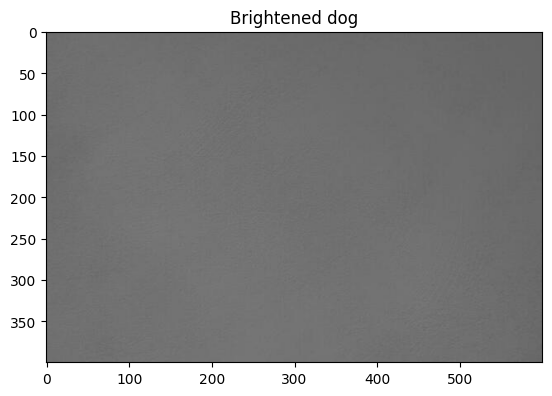

In [5]:
brightened=increase_brightness(original,100)
plt.imshow(cv2.cvtColor(brightened,cv2.COLOR_BGR2RGB))
plt.title("Brightened dog")

Reversing the contrast using I(m0​,n0)=I MAX−I(m0,n0)+IMIN
​


(-0.5, 293.5, 170.5, -0.5)

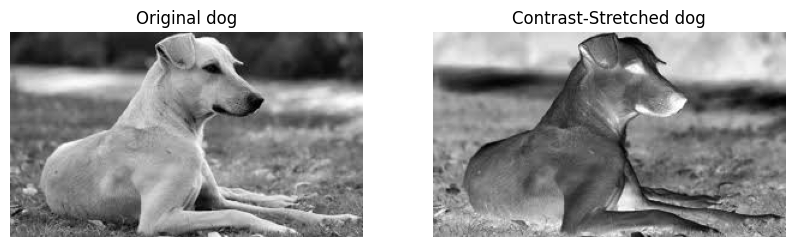

In [6]:
dog=cv2.cvtColor(cv2.imread('dog.jpg'),cv2.COLOR_BGR2GRAY)
I_min_xy = np.min(dog)  
I_max_xy = np.max(dog)
contrast_dog=I_max_xy-dog+I_min_xy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dog, cmap='gray')
plt.title("Original dog")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(contrast_dog, cmap='gray')
plt.title("Contrast-Stretched dog")
plt.axis("off")

(I(m0 n0) -MinxyI(xy) )*
 ((IMAX -IMIN) /(MaxxyI(xy) -MinxyI(xy)) +IMIN using these formula

(-0.5, 293.5, 170.5, -0.5)

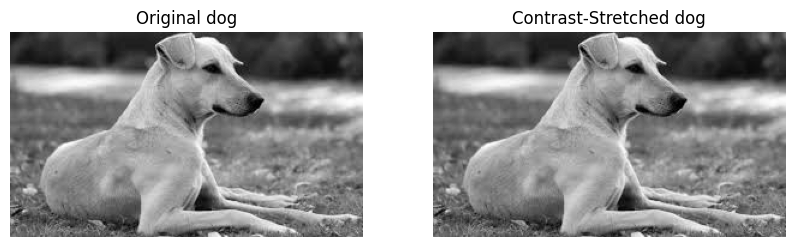

In [8]:
def contrast_stretching(dog, I_MIN=0, I_MAX=255):
    I_min_xy = np.min(dog)  # Minimum intensity in the input dog
    I_max_xy = np.max(dog)  # Maximum intensity in the input dog
    stretched = (dog - I_min_xy) * ((I_MAX - I_MIN) / (I_max_xy - I_min_xy)) + I_MIN
    return stretched.astype(np.uint8)


stretched_dog = contrast_stretching(dog)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(dog, cmap='gray')
plt.title("Original dog")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(stretched_dog, cmap='gray')
plt.title("Contrast-Stretched dog")
plt.axis("off")

In [9]:
salt_pepper_image=cv2.imread('Noise_salt_and_pepper.png')


Linear filters

In [10]:
#Gausian filter
def apply_gaussian_filter(image, kernel_size=(5, 5), sigma=0):
    filtered_image = cv2.GaussianBlur(image, kernel_size, sigma)
    return filtered_image

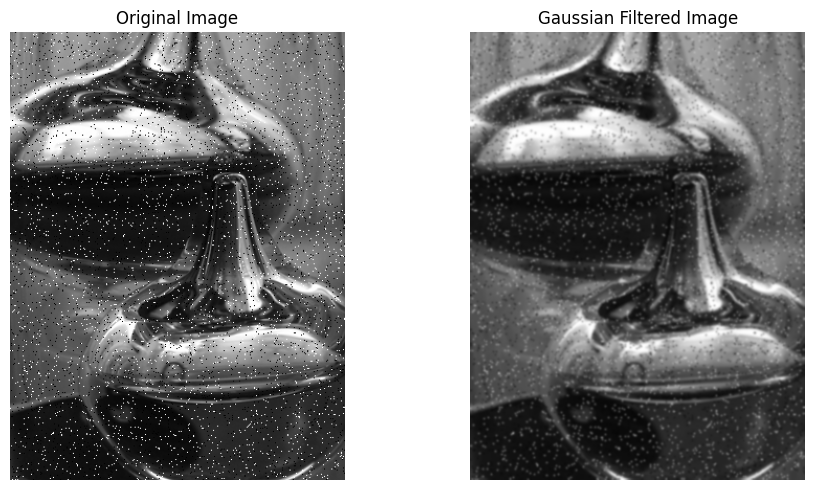

In [11]:
gaussian_filtered = apply_gaussian_filter(salt_pepper_image, kernel_size=(5, 5), sigma=1)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filtered Image")
plt.axis("off")

plt.tight_layout()
plt.show()

In [12]:
#Mean filter
def apply_mean_filter(image, kernel_size=(5, 5)):
    filtered_image = cv2.blur(image, kernel_size)
    return filtered_image

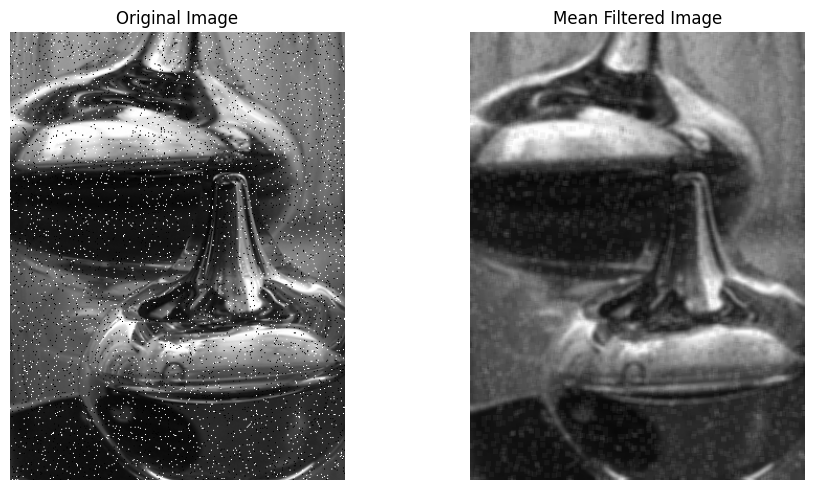

In [13]:
mean_filtered = apply_mean_filter(salt_pepper_image, kernel_size=(5, 5))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filtered Image")
plt.axis("off")

plt.tight_layout()
plt.show()

In [14]:
#Moving average
def apply_moving_average_filter(image, kernel_size=(5, 5)):
    kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

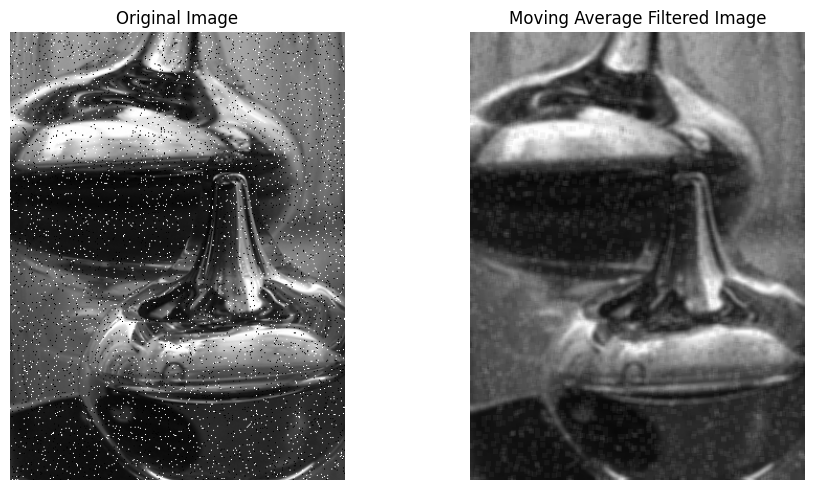

In [15]:
moving_avg_filtered = apply_moving_average_filter(salt_pepper_image, kernel_size=(5, 5))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(moving_avg_filtered, cmap='gray')
plt.title("Moving Average Filtered Image")
plt.axis("off")

plt.tight_layout()
plt.show()

Non Linear filters

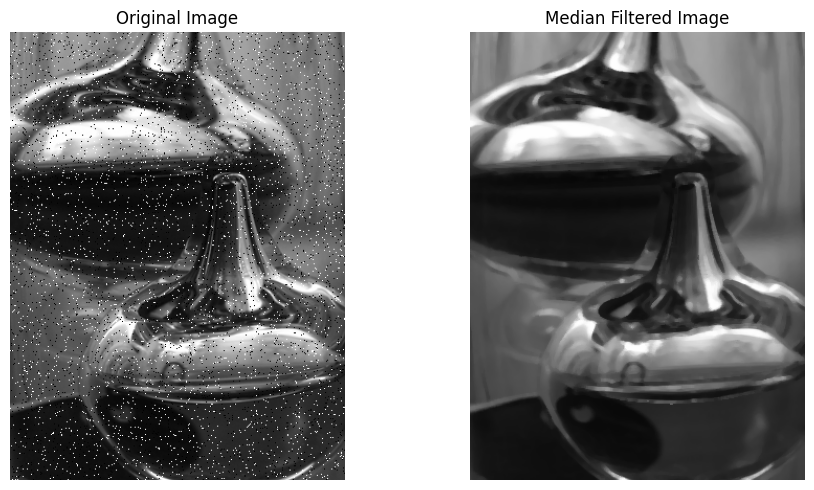

In [16]:
#Median Filter

def apply_median_filter(image, kernel_size=5):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image
  
median_filtered = apply_median_filter(salt_pepper_image, kernel_size=5)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered Image")
plt.axis("off")

plt.tight_layout()
plt.show()


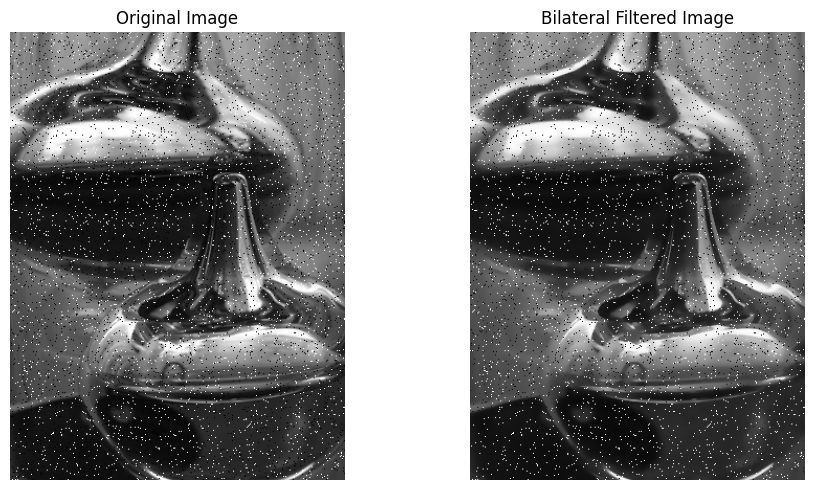

In [17]:

#Bilateral filter
def apply_bilateral_filter(image, d=9, sigma_color=75, sigma_space=75):
    filtered_image = cv2.bilateralFilter(image, d, sigma_color, sigma_space)
    return filtered_image
bilateral_filtered = apply_bilateral_filter(salt_pepper_image)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(bilateral_filtered, cmap='gray')
plt.title("Bilateral Filtered Image")
plt.axis("off")

plt.tight_layout()
plt.show()


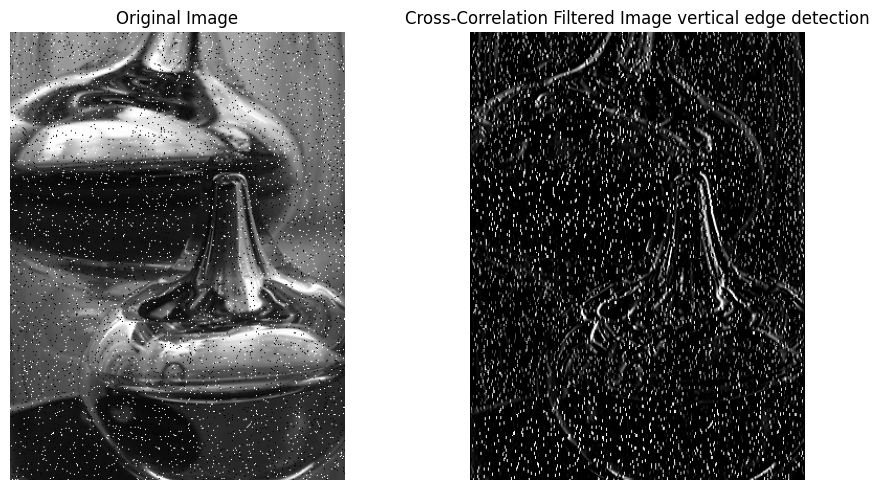

In [18]:
#Cross correlation
def apply_cross_correlation_filter(image, kernel):
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image


kernel = np.array([[1, 0, -1], 
                   [1, 0, -1],
                   [1, 0, -1]], dtype=np.float32)

cross_corr_filtered = apply_cross_correlation_filter(salt_pepper_image, kernel)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cross_corr_filtered, cmap='gray')
plt.title("Cross-Correlation Filtered Image vertical edge detection")
plt.axis("off")

plt.tight_layout()
plt.show()


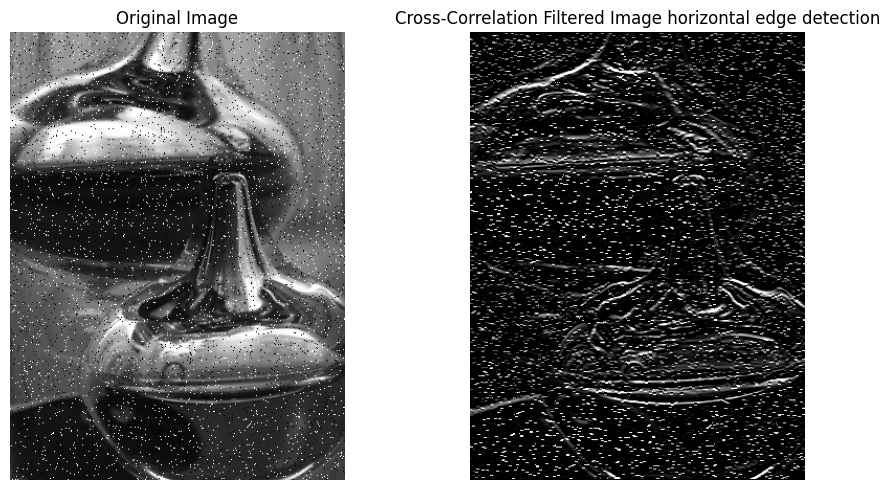

In [19]:
kernel = np.array([[1, 1, 1], 
                   [0, 0, 0],
                   [-1, -1, -1]], dtype=np.float32)

cross_corr_filtered = apply_cross_correlation_filter(salt_pepper_image, kernel)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cross_corr_filtered, cmap='gray')
plt.title("Cross-Correlation Filtered Image horizontal edge detection")
plt.axis("off")

plt.tight_layout()
plt.show()

Sobel Filters

In [20]:
#Sobel Filters
sobel_x = cv2.Sobel(dog, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x direction
sobel_y = cv2.Sobel(dog, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y direction

In [21]:
# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

In [22]:
# Normalize Sobel outputs to 0-255 for display
sobel_x_display = cv2.normalize(np.abs(sobel_x), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
sobel_y_display = cv2.normalize(np.abs(sobel_y), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
gradient_magnitude_display = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

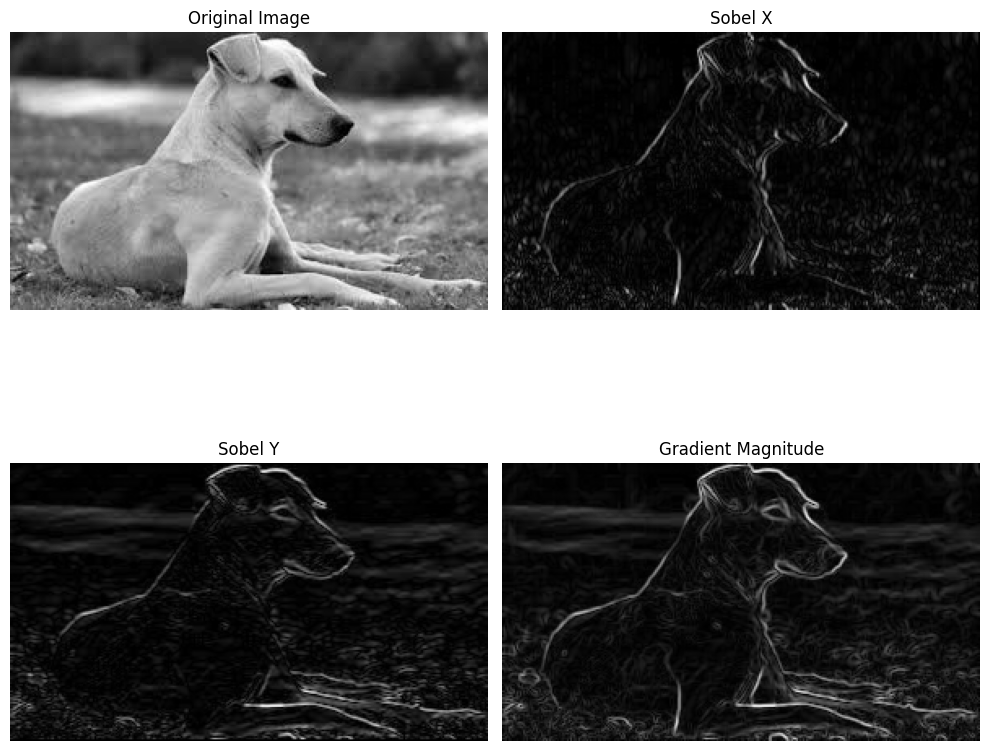

In [23]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(dog, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x_display, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y_display, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Gradient Magnitude")
plt.imshow(gradient_magnitude_display, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

econd order gradient using laplacian operator

In [24]:
laplacian = cv2.Laplacian(dog, cv2.CV_64F, ksize=3)

# Normalize the Laplacian for better visualization
laplacian_normalized = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8 for display
laplacian_uint8 = laplacian_normalized.astype(np.uint8)

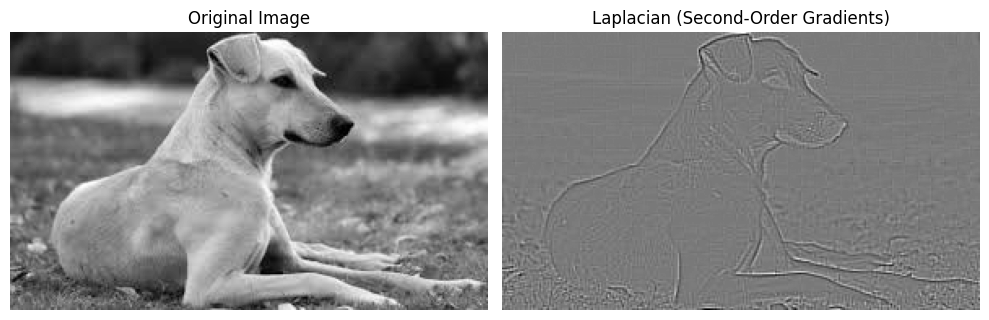

In [25]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(dog, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Laplacian (Second-Order Gradients)")
plt.imshow(laplacian_uint8, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()